<a href="https://colab.research.google.com/github/AngelicaG9999/Entregas-Machine-Learning/blob/main/G%C3%B3mezMart%C3%ADnezAng%C3%A9licaMaria_E2_V18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📘 Entrega 2 – Aprendizaje de Máquinas**

## Ejercicio 1 - Clasificación (C = 2.0)

Implemente y compare los siguientes algoritmos de clasificación para la base de datos [Breast Cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). Compare el desempeño de los diferentes clasificadores dibujando las fronteras de decisión para cada uno.

**Clasificadores**
1. Regresión logística
2. Clasificador kNN
3. Clasificador SVM (kernel sigmoide)
4. Clasificador SVM (kernel de base radial - rbf)


**⚠️ NOTA:** Los datos se generarán de acuerdo a su número de CC 🔢.
\
\
Al ejecutar la celda, use las variables ```Data``` y ```labels``` para resolver el trabajo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits # Base de datos
from sklearn.model_selection import train_test_split

#@markdown ------
#@markdown #### **⚠️ Ingrese su número de CC**. ⬇
CC = 1017270210 #@param {type:"number"}
# https://drive.google.com/file/d/1iE-lpTRWrzACm6kHGU5pclm4rULUhrHw/view?usp=sharing

!gdown -qq "https://drive.google.com/uc?id=1iE-lpTRWrzACm6kHGU5pclm4rULUhrHw" -O /eval_tools-1.6-py3-none-any.whl
!pip3 -qq install /eval_tools-1.6-py3-none-any.whl
!rm -r /eval_tools-1.6-py3-none-any.whl

import matplotlib.pyplot as plt
from eval_tools import import_breast_class_from_CC

Data, _, labels, _ = import_breast_class_from_CC (CC)

#@markdown ------

Check variables ```Data``` and ```labels```. Also, we plot some samples

-------------------------- Info del dataset --------------------------
 
Data, labels shapes: (455, 2), (455,)
Nro muestras: 455
Nro caracteristicas: 2
Nro clases: 2
ID de las clases: [0 1]




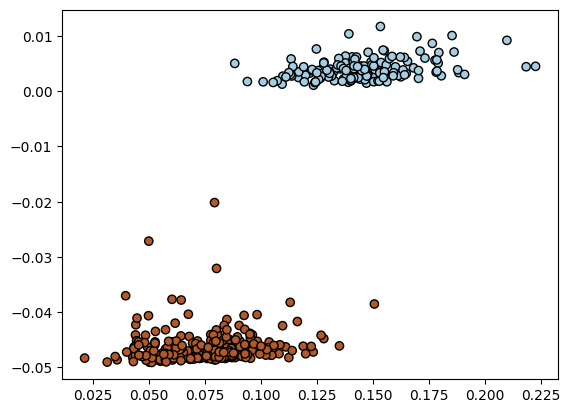

In [ ]:
print (" Info del dataset ".center(70, '-'))
print (" \nData, labels shapes: {0}, {1}".format(Data.shape, labels.shape))
print ("Nro muestras: {0}".format(Data.shape[0]))
print ("Nro caracteristicas: {0}".format(Data.shape[1]))
print ("Nro clases: {0}".format(len(np.unique(labels))))
# print ("Nombres de las clases: {0}".format(list(data.target_names)))
print ("ID de las clases: {0}\n\n".format(np.unique(labels)))

# plot la base de datos que debera procesar
plt.scatter(Data[:, 0], Data[:, 1], c=labels, edgecolors='k', cmap=plt.cm.Paired)

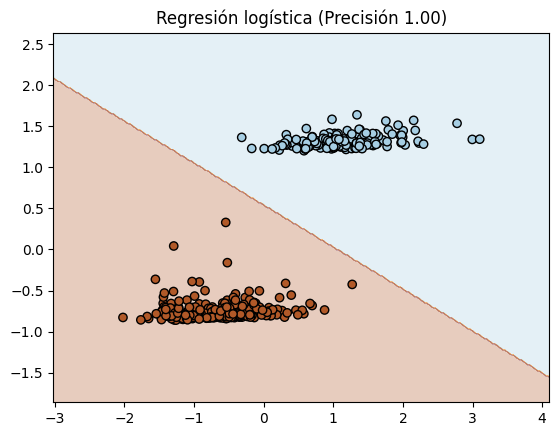

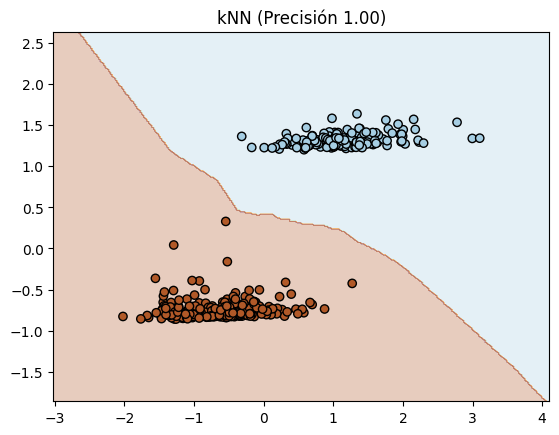

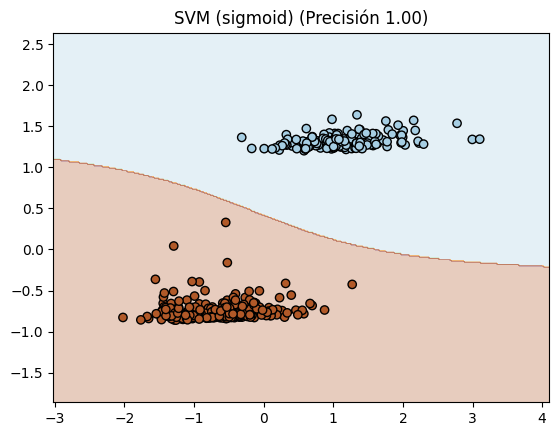

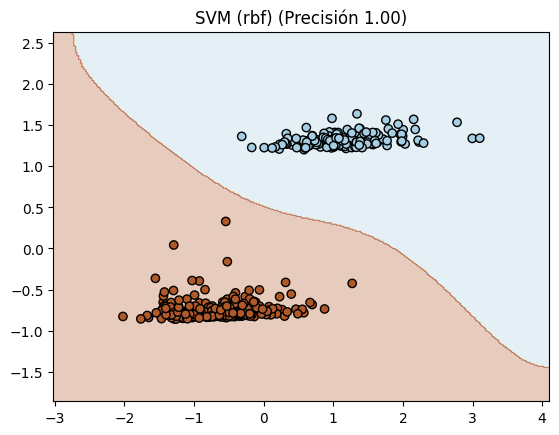

In [ ]:
# Ingrese el código para realizar la clasificación con los algoritmos aquí.
# Utilice cuantas celdas de código necesite

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#plots parea los datos y solo se selecciona 2 columnas
x = Data[:, :2]
y = labels

# Escalo datos para mejor rendimiento en los modelos SVM y Regresión logística
escalar = StandardScaler()
x_escalad = escalar.fit_transform(x)

# Divido en entrenamiento y prueba
x_entrenador, x_prueba, y_entrenador, y_prueba = train_test_split(x_escalad, y, test_size=0.3, random_state=42)

# Metodo para dibujar los plots con frontera de decisión
def plot_con_frontera(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

# Regresión logística
log_reg = LogisticRegression()
log_reg.fit(x_entrenador, y_entrenador)
precision_log = log_reg.score(x_prueba, y_prueba)
plot_con_frontera(log_reg, x_escalad, y, f"Regresión logística (Precisión {precision_log:.2f})")

# Clasificador kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_entrenador, y_entrenador)
precision_knn = knn.score(x_prueba, y_prueba)
plot_con_frontera(knn, x_escalad, y, f"kNN (Precisión {precision_knn:.2f})")

#Clasificador SVM (sigmoid)
svm_sigmoid = SVC(kernel="sigmoid")
svm_sigmoid.fit(x_entrenador, y_entrenador)
precision_sigmoid = svm_sigmoid.score(x_prueba, y_prueba)
plot_con_frontera(svm_sigmoid, x_escalad, y, f"SVM (sigmoid) (Precisión {precision_sigmoid:.2f})")

#Clasificador SVM (rbf)
svm_rbf = SVC(kernel="rbf", gamma=0.5)
svm_rbf.fit(x_entrenador, y_entrenador)
precision_rbf = svm_rbf.score(x_prueba, y_prueba)
plot_con_frontera(svm_rbf, x_escalad, y, f"SVM (rbf) (Precisión {precision_rbf:.2f})")

# --
# Muestre las fronteras de decisión de cada algoritmo y las metricas de desempeño


## Ejercicio 2 - Clasificación (C = 2.0)
Implemente y compare los siguientes algoritmos de clasificación para la base de datos de tipos de fríjoles 🌱, la cual contiene 4 características en total.
Para el entrenamiento de los modelos use el subconjunto ```dry_beans_train.csv``` 📂 (incluye datos y etiquetas).
Una vez entrenados, compare el desempeño calculando las fronteras de decisión 📊 en el subconjunto ```dry_beans_test.csv```.

**🔁 Importante para las fronteras:**
Para visualizar las fronteras correctamente, entrene usando 2 variables a la vez (elija diferentes pares de variables para comparar) 👉 (ver figura de salida en la siguiente celda).

**⚙️ Ajuste de hiperparámetros:**
Modifique los parámetros de cada algoritmo para mejorar las métricas ✅ (los valores por defecto no siempre rinden bien, p. ej., SVM).

**🎯 Objetivo de salida:**
Muestre un resultado similar (no necesariamente idéntico) a los ejemplos de la parte inferior.

**Clasificadores:**
1. Clasificador SVM (kernel polinómico)
2. Clasificador SVM (sigmoide)
3. Clasificador SVM (kernel de base radial - rbf)
4. Clasificador bayes ingenuo


**⚠️ NOTA:** Al ejecutar la celda, use los archivos ```dry_red_beans/dry_beans_train.csv``` y ```dry_red_beans/dry_beans_test.csv``` para resolver el trabajo

In [ ]:
#@markdown ---------------
#@markdown ## **⚠️❗ Ejecute esta celda para descargar Types of Beans dataset❗⚠️**
#@markdown ### Esta celda creará la carpeta ```/content/dry_red_beans```

import os
import urllib.request
_ = urllib.request.urlretrieve("https://drive.google.com/uc?id=1UFvAZBvtzYduyty22kUdFAyOxO7LIv6j", filename='/beans.zip')
os.makedirs('/content/', exist_ok=True)
!unzip -qq /beans.zip -d /content
!rm -r /beans.zip /content/__MACOSX
#@markdown ---------------

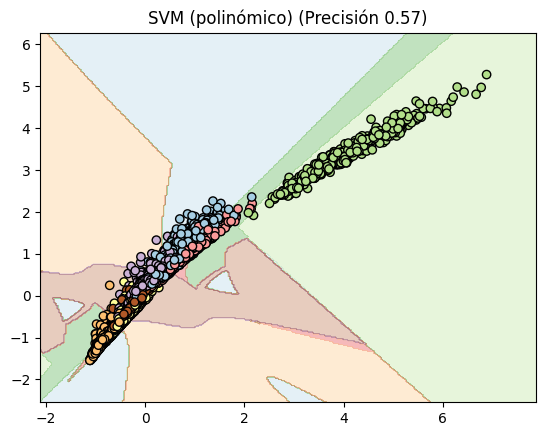

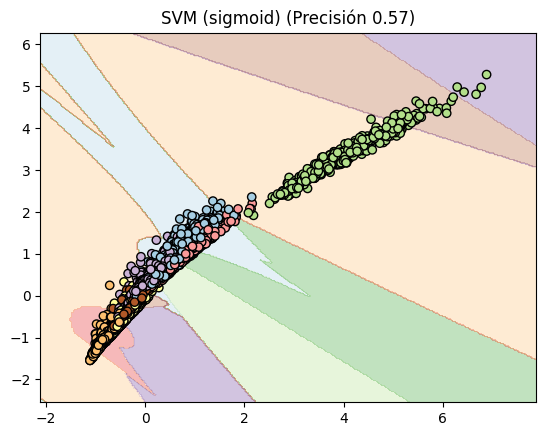

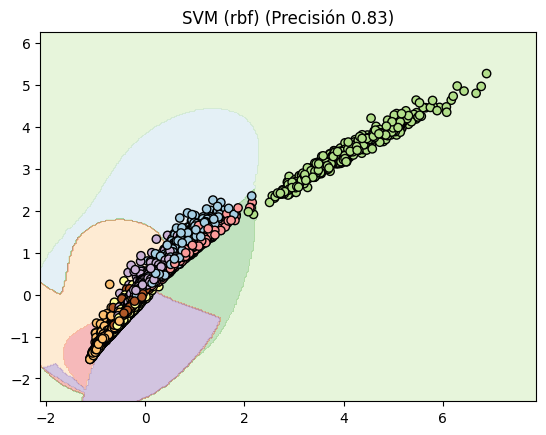

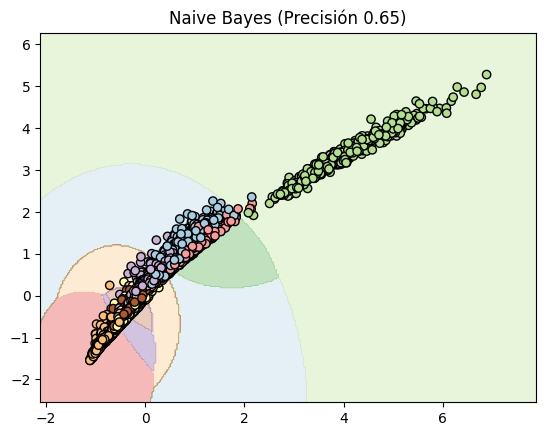

In [ ]:
# Ingrese el código para realizar la clasificación con los algoritmos aquí.
# Utilice cuantas celdas de código necesite
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Cargo los datos para entrenar y probar
entrenar = pd.read_csv("dry_red_beans/dry_beans_train.csv")
prueba = pd.read_csv("dry_red_beans/dry_beans_test.csv")

# Separo los datos y las etiquetas
x_entrenador = entrenar.iloc[:, :-1].values # todas las columnas menos la última de caracteristica
y_entrenador = entrenar.iloc[:, -1].values  # última columna de eetiquetas
x_prueba = entrenar.iloc[:, :-1].values
y_prueba = entrenar.iloc[:, -1].values

# Me quedo solo con 2 características para graficar (ejemplo: columnas 0 y 1)
x_entrenador_2d = x_entrenador[:, :2]
x_prueba_2d = x_prueba[:, :2]


# Escalar
escalar = StandardScaler()
x_entrenador_escalado = escalar.fit_transform(x_entrenador_2d)
x_prueba_escalado = escalar.transform(x_prueba_2d)

# Metodo para dibujar los plots con frontera de decisión
def plot_con_frontera(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

fuerza_regularizacion = 3.0
grado_polinomio = 4
valor_gamma = 0.5

# SVM polinómico
svm_poly = SVC(kernel="poly", degree=grado_polinomio, C=fuerza_regularizacion)
svm_poly.fit(x_entrenador_escalado, y_entrenador)
prec_poly = svm_poly.score(x_prueba_escalado, y_prueba)
plot_con_frontera(svm_poly, x_entrenador_escalado, y_entrenador, f"SVM (polinómico) (Precisión {prec_poly:.2f})")

# SVM sigmoide
svm_sigmoid = SVC(kernel="sigmoid", C=fuerza_regularizacion)
svm_sigmoid.fit(x_entrenador_escalado, y_entrenador)
prec_sigmoid = svm_sigmoid.score(x_prueba_escalado, y_prueba)
plot_con_frontera(svm_sigmoid, x_entrenador_escalado, y_entrenador, f"SVM (sigmoid) (Precisión {prec_sigmoid:.2f})")

#SVM rbf
svm_rbf = SVC(kernel="rbf", gamma=valor_gamma, C=fuerza_regularizacion)
svm_rbf.fit(x_entrenador_escalado, y_entrenador)
prec_rbf = svm_rbf.score(x_prueba_escalado, y_prueba)
plot_con_frontera(svm_rbf, x_entrenador_escalado, y_entrenador, f"SVM (rbf) (Precisión {prec_rbf:.2f})")


# Naive Bayes
nb = GaussianNB()
nb.fit(x_entrenador_escalado, y_entrenador)
prec_nb = nb.score(x_prueba_escalado, y_prueba)
plot_con_frontera(nb, x_entrenador_escalado, y_entrenador, f"Naive Bayes (Precisión {prec_nb:.2f})")

# --
# Muestre y compare las métricas por cada algoritmo.


## Ejercicio 3 – Regresión (C = 1.0)

Implemente los siguientes modelos de regresión sobre los datos:

- Regresión lineal
- Máquina de soporte de regresión (SVR)

**⚙️ Tareas a realizar:**

- 🏋️‍♂️ Entrene los modelos con las variables ```train_data``` y ```train_targets```.
- 📊 Calcule el MAE (Mean Absolute Error) y el MSE (Mean Squared Error).
- 🖨️ Imprima los resultados sobre las variables ```test_data``` y ```test_targets```.
- 🎨 Dibuje la línea de regresión en color verde 🟩.

✅ El resultado debe ser similar (no idéntico) a la figura mostrada en la parte inferior.


**⚠️ NOTA:** Los datos se generarán de acuerdo a su número de CC 🔢.

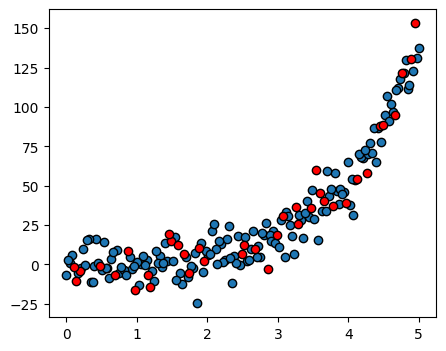

In [ ]:
#@markdown ------
#@markdown #### **⚠️ Ingrese su número de CC**. ⬇

!gdown -qq "https://drive.google.com/uc?id=1kAjFkk0x0m85nPzR-1LSpWgGMr2NkH82" -O /eval_tools-1.4-py3-none-any.whl
!pip3 -qq install /eval_tools-1.4-py3-none-any.whl
!rm -r /eval_tools-1.4-py3-none-any.whl

import matplotlib.pyplot as plt
from eval_tools import load_regression_from_CC

CC = 1017270210 #@param {type:"number"}

train_data, test_data, train_targets, test_targets = load_regression_from_CC (CC)

_, axes = plt.subplots(figsize=(5,4))
axes.scatter(train_data, train_targets, edgecolors='k');
axes.scatter(test_data, test_targets, edgecolors='k', c = "r");

#@markdown ------

Check variables ```train_data, test_data, train_targets``` and ```test_targets```

In [ ]:
print (train_data.shape, train_targets.shape, test_data.shape, test_targets.shape)

(152,) (152,) (38,) (38,)


In [ ]:
print(train_targets)

[ 21.00281187  -2.54956588  18.42200637 -11.49333659   5.26343143
  94.71830755  91.22666175  18.63593023   3.17234395  -3.09496502
  43.63913747  -5.38529454  96.84344845  33.92513394  -3.60192751
  58.17815328  12.98439013   2.05259299  31.4911756   16.12019359
  -1.46303795  16.10643868  30.36480929   0.21465316 137.69304494
  -1.95439215  40.00079533  67.68157509  15.24049144   9.65973143
   2.03597576  28.29059745   8.95125485  18.08514033  25.99930429
  -3.88304808 122.74434166  17.50365641 -12.1359026    1.21387268
  -9.93930047  14.97846122 111.71628481   2.8822029   -0.40887445
  -0.49043177  -4.95722851 111.38556347  77.96556475   6.75415063
  37.5025658   13.88143608  46.21001327 129.9774415    5.34411625
  53.50020579   2.84458919   4.76206523  46.84888697   5.42386551
   7.18725609   0.99760531   8.32037862   3.0949866  -11.01810592
  68.092195    -8.48808291 110.85710298  31.70501814  14.0680556
  -0.67064936  21.45630301   4.68961848   0.7855928   21.22243197
   6.112555


Regresión Lineal 
MAE: 17.18 
MSE: 488.98


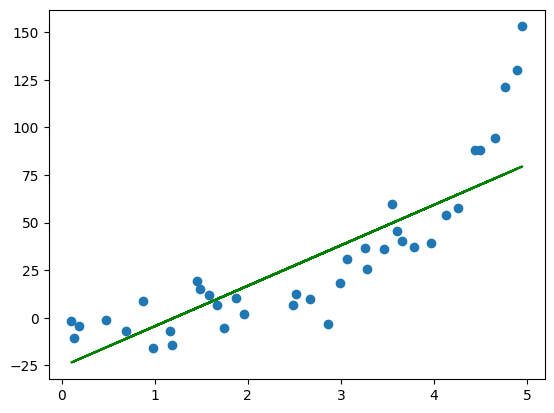


Máquina de soporte de regresión (SVR)  
MAE: 17.37, 
MSE: 821.66


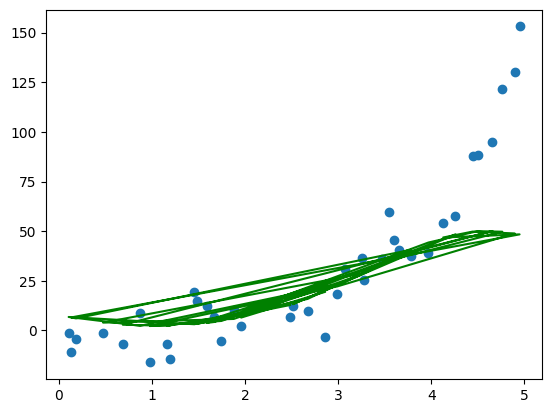

In [ ]:
# Ingrese el código aquí.
# Utilice cuantas celdas de código necesite
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

# se tranforma en una matriz 2D
train_data = np.array(train_data).reshape(-1, 1)
test_data = np.array(test_data).reshape(-1, 1)

# Regresión Lineal
lin_reg = LinearRegression()
lin_reg.fit(train_data, train_targets)

pred_lineal = lin_reg.predict(test_data)

mae_lin = mean_absolute_error(test_targets, pred_lineal)
mse_lin = mean_squared_error(test_targets, pred_lineal)

print(f"\nRegresión Lineal \nMAE: {mae_lin:.2f} \nMSE: {mse_lin:.2f}")

plt.scatter(test_data, test_targets)
plt.plot(test_data, pred_lineal, color="green")
plt.show()

# Máquina de soporte de regresión (SVR)
svr_model = SVR(kernel="rbf", C=1.0, epsilon=0.1, gamma=0.5)
svr_model.fit(train_data, train_targets)

pred_svr = svr_model.predict(test_data)

mae_svr = mean_absolute_error(test_targets, pred_svr)
mse_svr = mean_squared_error(test_targets, pred_svr)

print(f"\nMáquina de soporte de regresión (SVR)  \nMAE: {mae_svr:.2f}, \nMSE: {mse_svr:.2f}")

plt.scatter(test_data, test_targets)
plt.plot(test_data, pred_svr, color="green")
plt.show()

# --
# Muestre la línea de la regresión. Obtenga un gráfico similar al siguiente
